**Table of contents**<a id='toc0_'></a>    
- [Import packages](#toc1_1_)    
  - [Import datsets](#toc1_2_)    
  - [Data Preparation: Drop Columns over 50% missing values](#toc1_3_)    
  - [Data Preparation: Impute Missing values by imputer](#toc1_4_)    
    - [Object variables](#toc1_4_1_)    
    - [Number(Float64) variables](#toc1_4_2_)    
  - [Data Preparation: Encoding the categorical variables](#toc1_5_)    
      - [Label Encoding](#toc1_5_1_1_)    
      - [One-Hot Encoding](#toc1_5_1_2_)    
  - [Model Process: Model predictors & target assignment](#toc1_6_)    
  - [Model Process: Train & Validation data split](#toc1_7_)    
  - [Model Process: Model selection & Comparison](#toc1_8_)    
    - [Decision Tree](#toc1_8_1_)    
    - [Logistic Regression](#toc1_8_2_)    
    - [Random Forest](#toc1_8_3_)    
    - [Naive Baysian](#toc1_8_4_)    
    - [xgboost](#toc1_8_5_)    
  - [Model Performance (Evaluation)](#toc1_9_)    
    - [The AUC Score](#toc1_9_1_)    
  - [Test Submission](#toc1_10_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Import packages](#toc0_)

In [62]:
# import packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
%matplotlib inline

## <a id='toc1_2_'></a>[Import datsets](#toc0_)

In [2]:
# import train & test datasets
train = pd.read_csv('/Users/imdongchan/Documents/GitHub/MSBA/CapstoneProject/data/raw/application_train.csv', header = 0, sep = ',', index_col= 0)
test = pd.read_csv('/Users/imdongchan/Documents/GitHub/MSBA/CapstoneProject/data/raw/application_test.csv', header = 0, sep = ',', index_col= 0)

In [72]:
train.shape, test.shape

((307511, 189), (48744, 185))

## <a id='toc1_3_'></a>[Data Preparation: Drop Columns over 50% missing values](#toc0_)

In [3]:
temp = (train.isnull().sum() / len(train) * 100).sort_values(ascending= False)

train_missing_df = pd.DataFrame({'Column':temp.index, 'Prop':temp.values})
columns_to_drop = train_missing_df.loc[train_missing_df.Prop > 50, 'Column'].to_list()
columns_to_drop

['COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'COMMONAREA_MEDI',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MODE',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_AVG',
 'LANDAREA_MODE',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MODE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'LIVINGAREA_AVG',
 'HOUSETYPE_MODE']

In [4]:
# drop the columns over 50% missing values
train.drop(columns = columns_to_drop, axis= 1, inplace= True)
test.drop(columns = columns_to_drop, axis= 1, inplace= True)

In [71]:
train.shape, test.shape

((307511, 189), (48744, 185))

In [5]:
temp = (train.isnull().sum() / len(train) * 100).sort_values(ascending= False)

train_missing_df = pd.DataFrame({'Column':temp.index, 'Prop':temp.values})
train_missing_df.head(20)

,Column,Prop
0,FLOORSMAX_MEDI,49.760822
1,FLOORSMAX_MODE,49.760822
2,FLOORSMAX_AVG,49.760822
3,YEARS_BEGINEXPLUATATION_MEDI,48.781019
4,YEARS_BEGINEXPLUATATION_MODE,48.781019
5,YEARS_BEGINEXPLUATATION_AVG,48.781019
6,TOTALAREA_MODE,48.268517
7,EMERGENCYSTATE_MODE,47.398304
8,OCCUPATION_TYPE,31.345545
9,EXT_SOURCE_3,19.825307


In [6]:
temp = (test.isnull().sum() / len(test) * 100).sort_values(ascending= False)

test_missing_df = pd.DataFrame({'Column':temp.index, 'Prop':temp.values})
test_missing_df.head(20)

,Column,Prop
0,FLOORSMAX_MEDI,47.843837
1,FLOORSMAX_MODE,47.843837
2,FLOORSMAX_AVG,47.843837
3,YEARS_BEGINEXPLUATATION_MEDI,46.889874
4,YEARS_BEGINEXPLUATATION_MODE,46.889874
5,YEARS_BEGINEXPLUATATION_AVG,46.889874
6,TOTALAREA_MODE,46.413918
7,EMERGENCYSTATE_MODE,45.562531
8,OCCUPATION_TYPE,32.014197
9,EXT_SOURCE_3,17.782701


## <a id='toc1_4_'></a>[Data Preparation: Impute Missing values by imputer](#toc0_)

### <a id='toc1_4_1_'></a>[Object variables](#toc0_)

- we can utilize `SimpleImputer` class to impute the most frequent value in the categorical variables.


In [7]:
# get categorical variable list with missing values
object_columns = train.select_dtypes(include='object').columns
object_impute_df = train[object_columns].isnull().any(axis=0)
object_impute_col = object_impute_df[object_impute_df.values == True].index.to_list()
object_impute_col

['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'EMERGENCYSTATE_MODE']

### <a id='toc1_4_2_'></a>[Number(Float64) variables](#toc0_)

- we can utilize `SimpleImputer` class to impute the median value in the numeric variables.

In [8]:
# get numerical variable list with missing values
number_columns = train.select_dtypes(include='number').columns
number_impute_df = train[number_columns].isnull().any(axis=0)
number_impute_col = number_impute_df[number_impute_df.values == True].index.to_list()
number_impute_col

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [9]:
imp_cat_freq = SimpleImputer(strategy="most_frequent")
imp_num_median = SimpleImputer(missing_values= np.nan, strategy="median")

train[object_impute_col] = imp_cat_freq.fit_transform(train[object_impute_col])
train[number_impute_col] = imp_num_median.fit_transform(train[number_impute_col])

test[object_impute_col] = imp_cat_freq.transform(test[object_impute_col])
test[number_impute_col] = imp_num_median.transform(test[number_impute_col])


In [10]:
train.isnull().sum()

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 80, dtype: int64

In [11]:
test.isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 79, dtype: int64

## <a id='toc1_5_'></a>[Data Preparation: Encoding the categorical variables](#toc0_)

There are two methodolgies to encode the categorical variables as numeric values.
- Label Encoding
- One-hot Encoding

#### <a id='toc1_5_1_1_'></a>[Label Encoding](#toc0_)

In [12]:
# Iterate through the columns
def label_encoding(train, test):
    le = LabelEncoder()
    le_count = 0
    for col in train:
        if train[col].dtype == 'object':
            # If 2 or fewer unique categories
            if len(list(train[col].unique())) <= 2:
                # Train on the training data
                le.fit(train[col])
                # Transform both training and testing data
                train[col] = le.transform(train[col])
                test[col] = le.transform(test[col])
            
                # Keep track of how many columns were label encoded
                le_count += 1           
    print('%d columns were label encoded.' % le_count)

label_encoding(train, test)

4 columns were label encoded.


#### <a id='toc1_5_1_2_'></a>[One-Hot Encoding](#toc0_)

In [13]:
# one-hot encoding of categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 189)
Testing Features shape:  (48744, 185)


## <a id='toc1_6_'></a>[Model Process: Model predictors & target assignment](#toc0_)

In [14]:
X= train.drop(columns=['TARGET'])
y= train['TARGET']

## <a id='toc1_7_'></a>[Model Process: Train & Validation dataset split](#toc0_)

In [15]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=.30, random_state= 42)

In [16]:
print("X train's shape: ", x_train.shape)
print("y train's shape: ", y_train.shape)
print("X valid's shape: ", x_valid.shape)
print("y valid's shape: ", y_valid.shape)

X train's shape:  (215257, 188)
y train's shape:  (215257,)
X valid's shape:  (92254, 188)
y valid's shape:  (92254,)


## <a id='toc1_8_'></a>[Model Process: Model selection & Comparison](#toc0_)

### <a id='toc1_8_1_'></a>[Decision Tree](#toc0_)

In [17]:
dcn_tree = DecisionTreeClassifier(max_depth= 5)

# Train on the training data
dcn_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

### <a id='toc1_8_2_'></a>[Logistic Regression](#toc0_)

In [18]:
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(x_train, y_train)

LogisticRegression(C=0.0001)

### <a id='toc1_8_3_'></a>[Random Forest](#toc0_)

In [19]:
rforest = RandomForestClassifier(random_state=42)

# Train on the training data
rforest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

### <a id='toc1_8_4_'></a>[Naive Baysian](#toc0_)

In [20]:
nb = GaussianNB()

# Train on the training data
nb.fit(x_train, y_train)

GaussianNB()

### <a id='toc1_8_5_'></a>[xgboost](#toc0_)

In [66]:
xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train on the training data
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

## <a id='toc1_9_'></a>[Model Performance (Evaluation)](#toc0_)

### <a id='toc1_9_1_'></a>[The AUC Score](#toc0_)

- The AUC score, or Area Under the Receiver Operating Characteristic (ROC) Curve, is a performance measurement for classification prediction. 
- The AUC score represents the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one.
- The AUC score is useful when dealing with imbalanced datasets because the AUC score is not affected by the proportion of the positive and negative classes.

In [22]:
def eval_model_auc(model):
    # Predict the probabilities for the positive class
    y_pred_proba = model.predict_proba(x_valid)[:, 1]

    # Calculate the AUC score
    auc_score = roc_auc_score(y_valid, y_pred_proba)

    print(f"{model}'s AUC Score: {auc_score}")

In [23]:
for m in [dcn_tree, log_reg, rforest, nb, xgb]:
    eval_model_auc(m)

DecisionTreeClassifier(max_depth=5)'s AUC Score: 0.7077005932903115
LogisticRegression(C=0.0001)'s AUC Score: 0.6185325348747959
RandomForestClassifier(random_state=42)'s AUC Score: 0.7084383959162353
GaussianNB()'s AUC Score: 0.6126112770030889
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...

XGB (xgboost) has the highest AUC score among the multiple classifier models (decision tree, logistic regression, random forest, naive beysian, xgboost)

In [67]:
def plot_roc_curve(model):
    # Predict the probabilities for the positive class
    y_pred_proba = model.predict_proba(x_valid)[:, 1]
    # Calculate the AUC score
    auc_score = roc_auc_score(y_valid, y_pred_proba)    
    fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


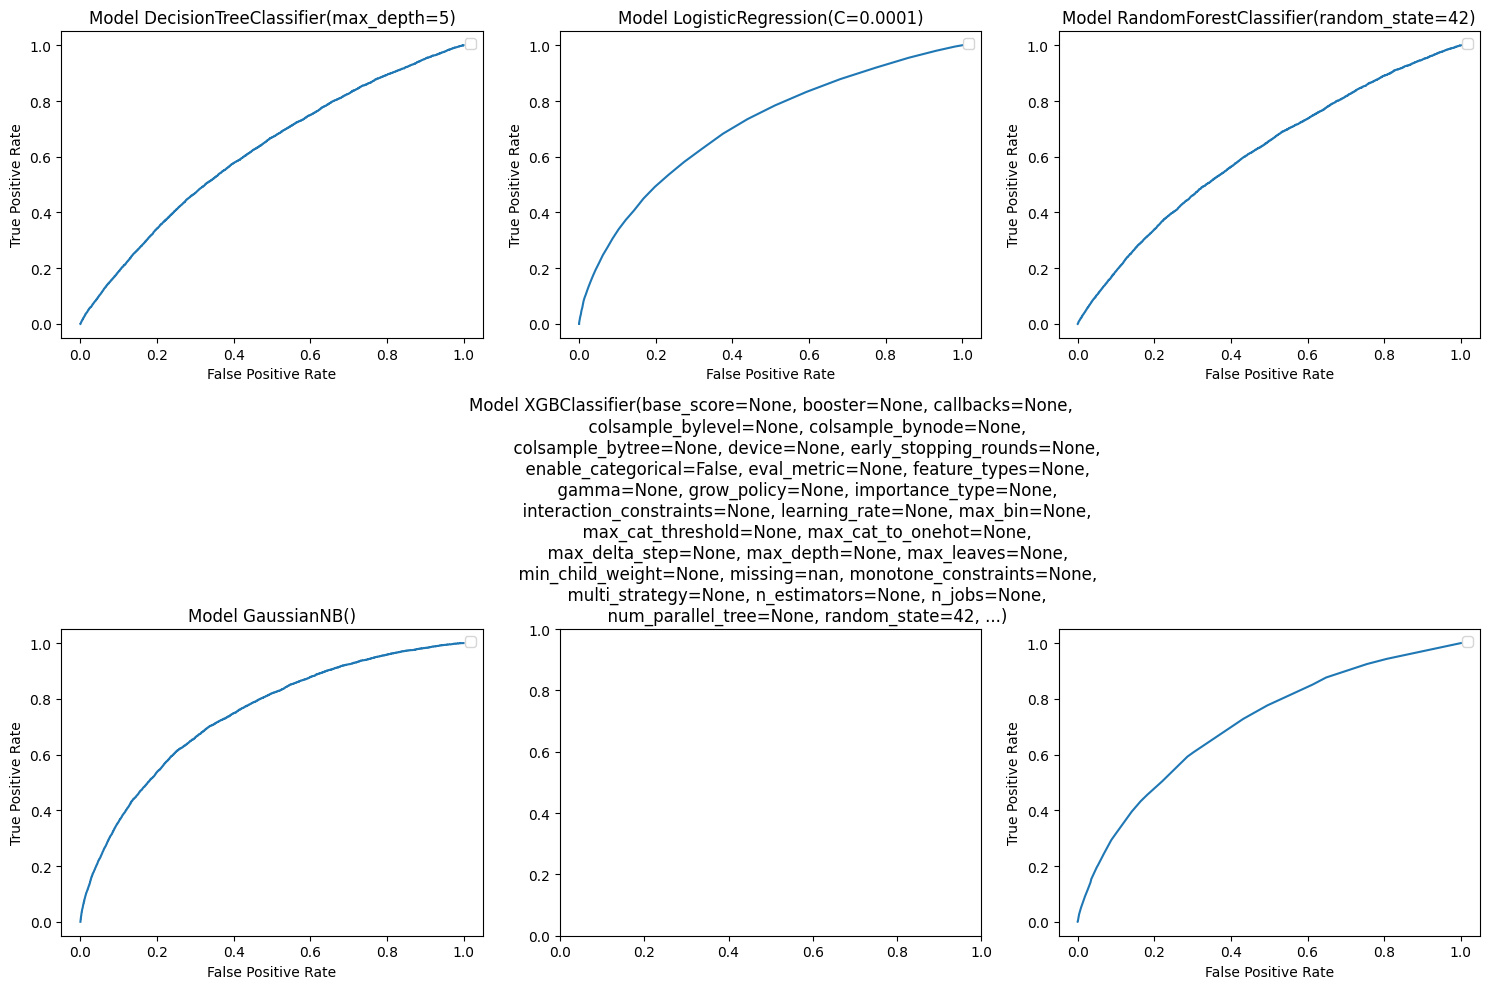

In [68]:
models = [dcn_tree, log_reg, rforest, nb, xgb]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, model in enumerate(models):
    plot_roc_curve(model)
    plt.sca(axs[i])
    plt.title(f"Model {model}")

plt.tight_layout()
plt.show()

## <a id='toc1_10_'></a>[Test Submission](#toc0_)